In [1]:
## IMporting Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## data gathering
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
## Data Pre-Processing
data.drop(['Id'], axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
## Labeling
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encodedY = encoder.fit(data[['Species']])
labeledY = encoder.transform(data[['Species']])
labeledY

C:\Python3.9\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
## Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaledX = scaler.fit_transform(data[['SepalLengthCm', 'SepalWidthCm']])
scaledX

array([[0.22222222, 0.625     ],
       [0.16666667, 0.41666667],
       [0.11111111, 0.5       ],
       [0.08333333, 0.45833333],
       [0.19444444, 0.66666667],
       [0.30555556, 0.79166667],
       [0.08333333, 0.58333333],
       [0.19444444, 0.58333333],
       [0.02777778, 0.375     ],
       [0.16666667, 0.45833333],
       [0.30555556, 0.70833333],
       [0.13888889, 0.58333333],
       [0.13888889, 0.41666667],
       [0.        , 0.41666667],
       [0.41666667, 0.83333333],
       [0.38888889, 1.        ],
       [0.30555556, 0.79166667],
       [0.22222222, 0.625     ],
       [0.38888889, 0.75      ],
       [0.22222222, 0.75      ],
       [0.30555556, 0.58333333],
       [0.22222222, 0.70833333],
       [0.08333333, 0.66666667],
       [0.22222222, 0.54166667],
       [0.13888889, 0.58333333],
       [0.19444444, 0.41666667],
       [0.19444444, 0.58333333],
       [0.25      , 0.625     ],
       [0.25      , 0.58333333],
       [0.11111111, 0.5       ],
       [0.

In [11]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
## Divide Train Test Data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    scaledX, labeledY, 
    test_size=0.2, random_state=49
)
xtrain.shape, ytrain.shape

((120, 2), (120,))

In [20]:
#Modelling
from sklearn import linear_model

## Init
model = linear_model.LogisticRegression()

## train
model.fit(xtrain, ytrain)

## Test Prediction
ypred = model.predict(xtest)
ypred == ytest

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False])

In [21]:
## Evaluation
from sklearn.metrics import confusion_matrix, f1_score
print('Confusion Matrix: \n', confusion_matrix(ytest, ypred))
print('F1 Score: ', f1_score(ytest, ypred, average='weighted'))

Confusion Matrix: 
 [[8 0 0]
 [1 7 2]
 [0 4 8]]
F1 Score:  0.7641117052881758


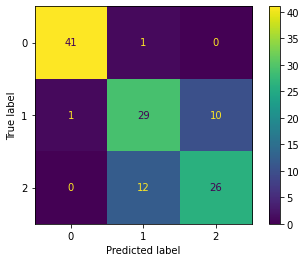

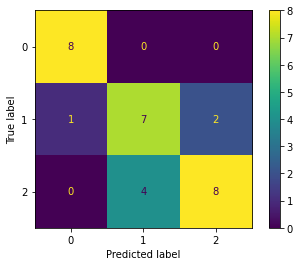

In [23]:
## Evaluation Plot
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, xtrain, ytrain)
plot_confusion_matrix(model, xtest, ytest)

In [25]:
setosa = data[data['Species'] == 'Iris-setosa']
versicolor = data[data['Species'] == 'Iris-versicolor']
virginica = data[data['Species'] == 'Iris-virginica']

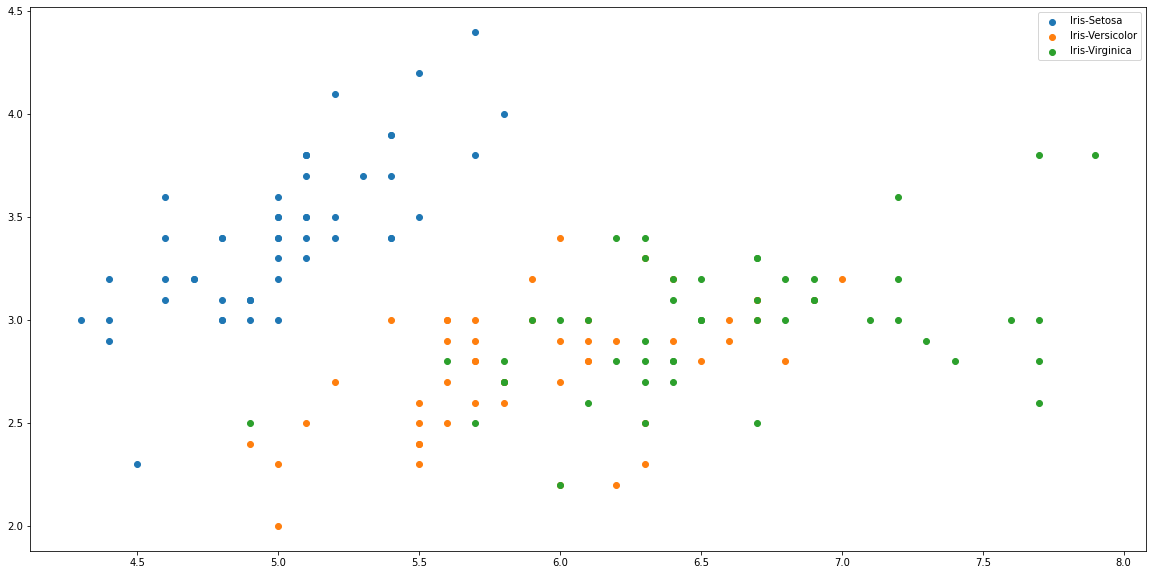

In [26]:
fig, axes = plt.subplots(1,1, figsize=(20,10))
axes.scatter(setosa[['SepalLengthCm']], setosa[['SepalWidthCm']], label = 'Iris-Setosa')
axes.scatter(versicolor[['SepalLengthCm']], versicolor[['SepalWidthCm']], label = 'Iris-Versicolor')
axes.scatter(virginica[['SepalLengthCm']], virginica[['SepalWidthCm']], label = 'Iris-Virginica')
plt.legend()
plt.show()

In [28]:
## Task 
linear_model.LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [34]:
## Finding Best K through Hyperparameter tuning
from sklearn import model_selection
gridmodel = linear_model.LogisticRegression()

##
grid = model_selection.GridSearchCV(
    gridmodel,
    param_grid={
        'penalty': ['l1', 'l2','elasticnet', 'none'],
        'max_iter': list(range(100,1000, 100)),
        'solver': ['lbfgs','newton-cg','saga','sag', 'liblinear'],
        'C': list(range(3,15, 1)),
        'multi_class': ['ovo','ovr'],
    },cv=5, n_jobs=-1, scoring='accuracy'
)
grid.fit(xtrain, ytrain)

C:\Python3.9\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.79166667 0.79166667        nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900],
                         'multi_class': ['ovo', 'ovr'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'saga', 'sag',
                                    'liblinear']},
             scoring='accuracy')

In [35]:
grid.best_params_, grid.best_estimator_

({'C': 5,
  'max_iter': 100,
  'multi_class': 'ovr',
  'penalty': 'l2',
  'solver': 'liblinear'},
 LogisticRegression(C=5, multi_class='ovr', solver='liblinear'))

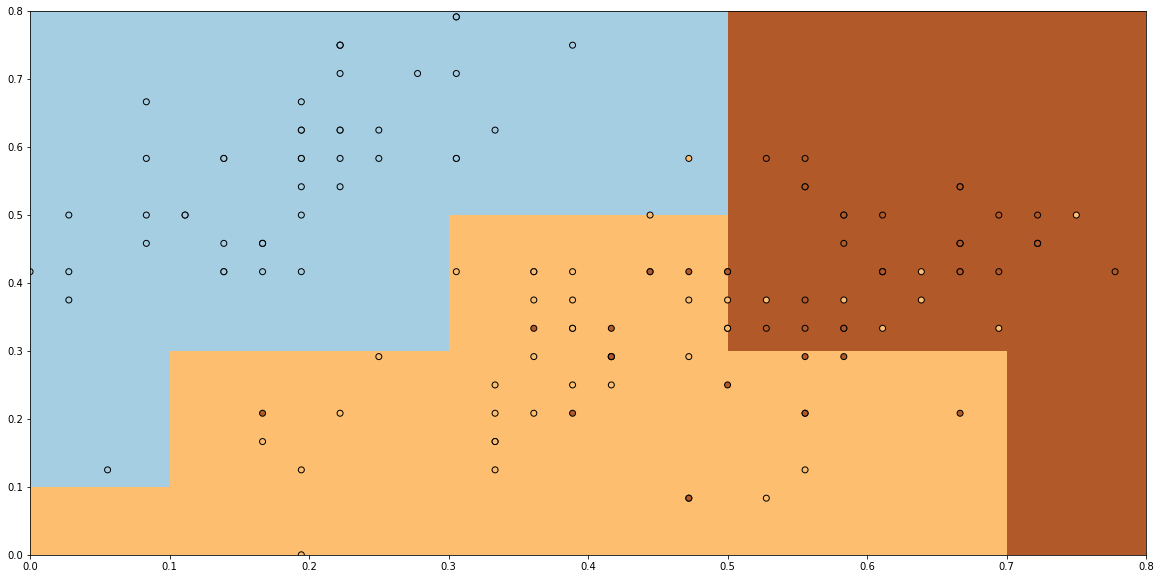

In [36]:
## Visualize Model
finalmodel = grid.best_estimator_
finalmodel.fit(xtrain, ytrain)

##
xmin, xmax = xtrain[:, 0].min(), xtrain[:, 0].max()
ymin, ymax = xtrain[:, 1].min(), xtrain[:, 1].max()
xmin, xmax, ymin, ymax

xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.2), np.arange(ymin, ymax, 0.2)
)
# np.c_[xx.ravel(), yy.ravel()]
yhat = finalmodel.predict(np.c_[xx.ravel(), yy.ravel()])
yhat.shape, xx.shape
##
yhat = yhat.reshape(xx.shape)
yhat.shape

## Plotting
plt.figure(1, figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, yhat, shading='auto')

plt.scatter(scaledX[:,0], scaledX[:, 1], c = labeledY, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()